# FACE MASK DETECTION 

Facemask detection with transfer learning involves leveraging pre-trained deep learning models, adapting them to detect the presence or absence of facemasks in images using a small dataset, thus enabling efficient deployment of accurate detection systems in real-world scenarios.

Import Required Libraries and Modules

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import glob
from sklearn.model_selection import train_test_split

collect image path

In [290]:
with_mask= glob.glob('with_mask 1/with_mask 1/*.jpg')
without_mask =glob.glob('without_mask/without_mask/*.jpg')

Define Classes and Corresponding Labels

In [291]:
classes = {0: 'with_mask', 1: 'without_mask'}

Load and Label Images for Each Category

In [292]:
images = []
labels = []

for i in with_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in without_mask:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

In [293]:
images=images

In [294]:
labels=labels

Plot first few images

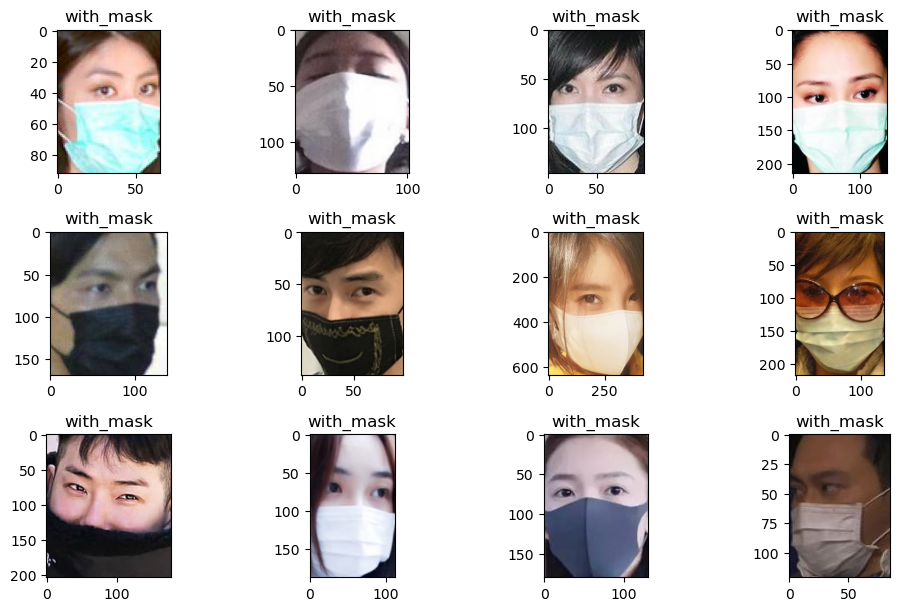

In [295]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

Shuffle the images

In [296]:
images,labels = shuffle(images,labels)

plot some after the shuffle

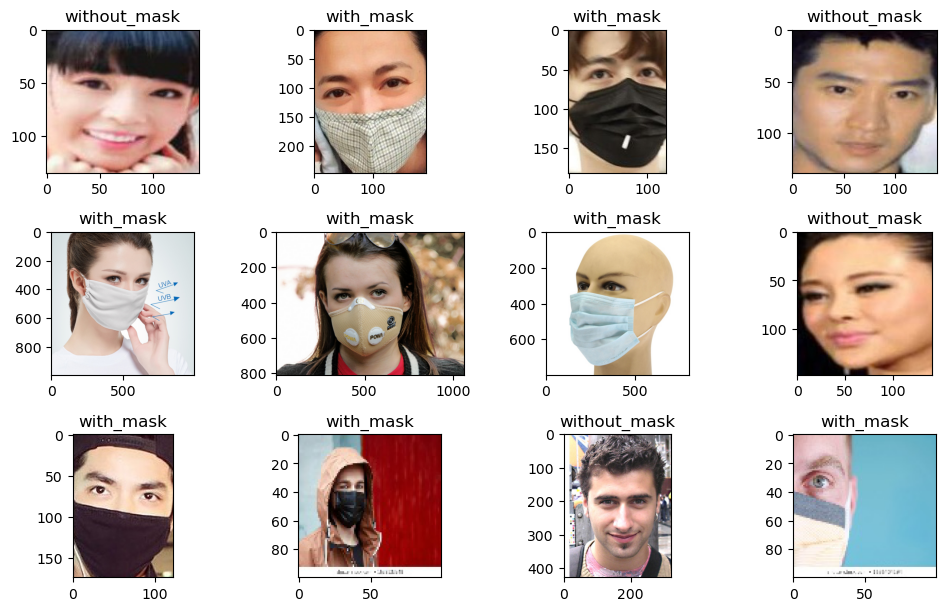

In [297]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

Resize the images to 64X64

In [298]:
X = []

for i in images:
    X.append(resize(i, (64,64,3)))

Plot some of the images after resizing

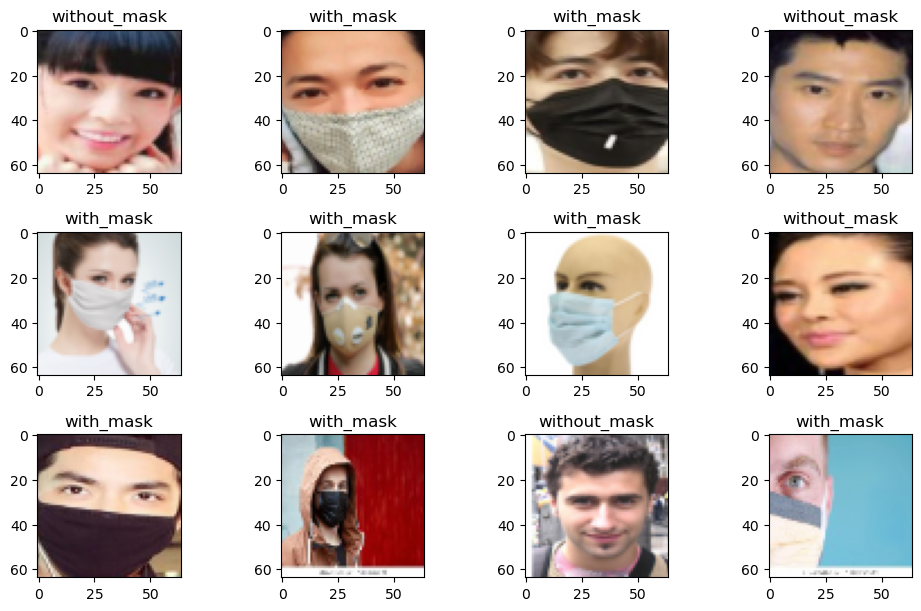

In [304]:
plt.figure(figsize=(10, 8))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.title(classes[labels[i]])
plt.tight_layout()

Convert image and label datatypes from list to Numpy array

In [305]:
X = np.array(X)
y = np.array(labels)

split in to training and testing test

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Check the shape of X_train and y_train

In [307]:
X_train.shape

(2790, 64, 64, 3)

In [308]:
y_train.shape

(2790,)

Create Keras Sequential model with 2 convolution layer, Flatten and a Hidden layer

In [315]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

compile our model

In [316]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [317]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,690 (1.55 MB)

 Trainable params: 406,690 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [318]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.1,batch_size=32)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.7243 - loss: 0.5244 - val_accuracy: 0.9498 - val_loss: 0.1879
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9181 - loss: 0.2435 - val_accuracy: 0.9319 - val_loss: 0.1751
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9417 - loss: 0.1538 - val_accuracy: 0.9283 - val_loss: 0.1782
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9426 - loss: 0.1466 - val_accuracy: 0.9642 - val_loss: 0.1232
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9668 - loss: 0.0976 - val_accuracy: 0.9677 - val_loss: 0.0957
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9700 - loss: 0.0827 - val_accuracy: 0.9642 - val_loss: 0.1062
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9749 - loss: 0.0714 - val_accuracy: 0.9606 - val_loss: 0.1097
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9753 - loss: 0.0772 - val_accuracy: 0.9534 - 

Evaluate our model

In [319]:
model.evaluate(X_train, y_train)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9975 - loss: 0.0159


[0.025238413363695145, 0.9942652583122253]

Model Prediction on Test Data

In [320]:
y_pred = model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [321]:
y_pred

array([[0.69899213, 0.11451879],
       [0.8303486 , 0.01356265],
       [0.92959344, 0.01508306],
       ...,
       [0.9366809 , 0.01059975],
       [0.00161443, 0.9892813 ],
       [0.00292839, 0.97999686]], dtype=float32)

In [324]:
pred=[np.argmax(i) for i in y_pred]

In [325]:
pred

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,


Calculate Accuracy Score

In [326]:
accuracy_score(y_test,pred)

0.9426934097421203

Plot confusion matrix on heatmap

<Axes: >

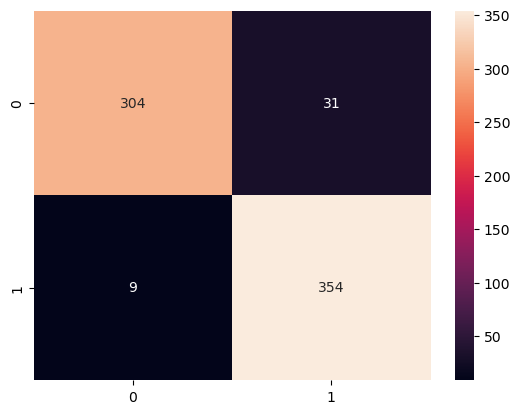

In [327]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True, fmt = 'd')

Print classification report

In [329]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.92      0.98      0.95       363

    accuracy                           0.94       698
   macro avg       0.95      0.94      0.94       698
weighted avg       0.94      0.94      0.94       698

